In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x_train = pd.read_csv("/Users/sarayu.madakasira/Downloads/fashion-mnist_train.csv")
x_test = pd.read_csv("/Users/sarayu.madakasira/Downloads/fashion-mnist_test.csv")

In [3]:
y_train = x_train['label']
y_test = x_test['label']

In [4]:
x_train = x_train.drop(columns=['label'])
x_test = x_test.drop(columns=['label'])

In [5]:
y_train = y_train.to_numpy().flatten() 
y_test = y_test.to_numpy().flatten()

In [6]:
x_train_min = x_train.min()
x_train_max = x_train.max()

x_train = (x_train - x_train_min) / (x_train_max - x_train_min)
x_test = (x_test - x_train_min) / (x_train_max - x_train_min)

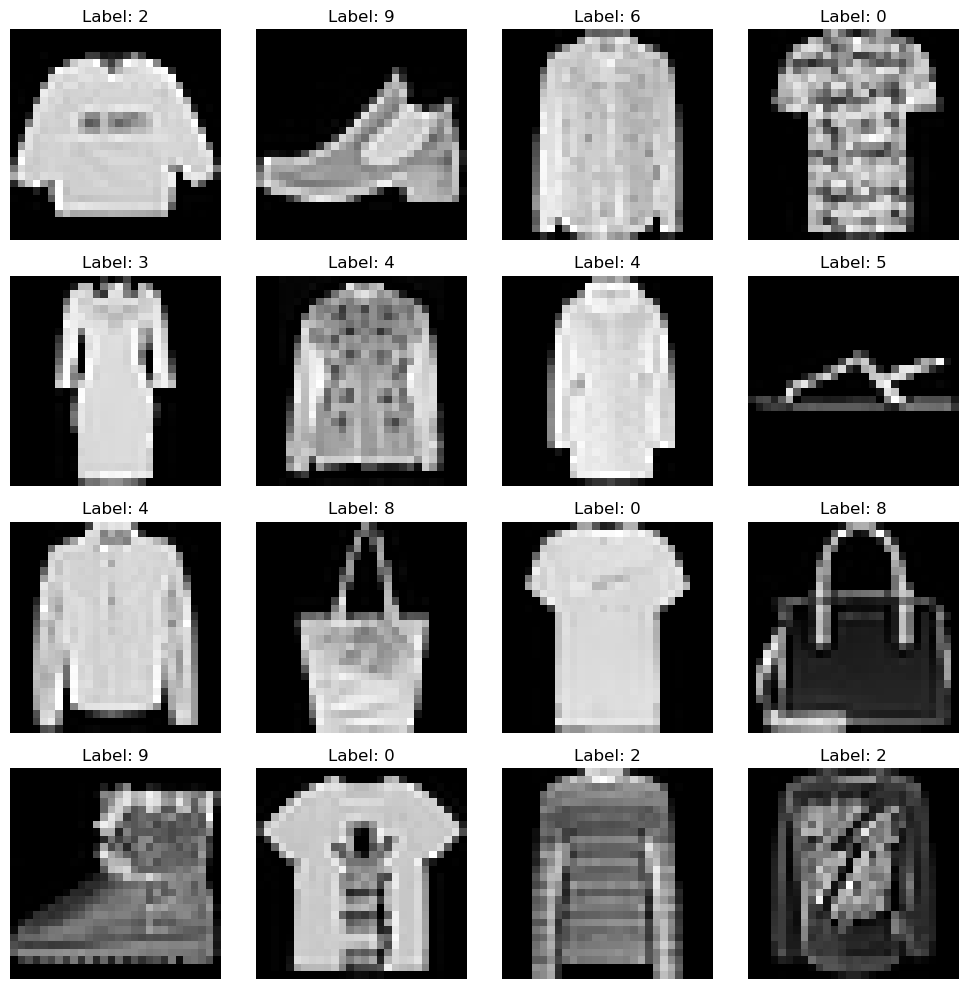

In [7]:
x_train_np = x_train.to_numpy()

num_images = 16
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(4, 4, i + 1)
    image_flattened = x_train_np[i]  
    image_reshaped = image_flattened.reshape(28, 28)  
    
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
x_train = x_train.T
x_test = x_test.T

In [9]:
x_train_np = x_train.to_numpy()
y_train_np = y_train  

ratio = 0.8 
total_rows = x_train_np.shape[1] 
train_size = int(total_rows * ratio)

x_train_split = x_train_np[:, :train_size]
y_train_split = y_train_np[:train_size]
x_val = x_train_np[:, train_size:]
y_val = y_train_np[train_size:]

In [10]:
def init_params(input_size, output_size):
    W1 = np.random.rand(10, input_size) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(output_size, 10) - 0.5
    b2 = np.random.rand(output_size, 1) - 0.5
    return W1, b1, W2, b2

input_size = x_train_split.shape[0]  
output_size = len(np.unique(y_train))  
W1, b1, W2, b2 = init_params(input_size, output_size)

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1] 
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

Iteration 0: Train Cost = 4.3149, Val Cost = 4.3708
Iteration 100: Train Cost = 0.9157, Val Cost = 0.9253
Iteration 200: Train Cost = 0.7938, Val Cost = 0.8085
Iteration 300: Train Cost = 0.7369, Val Cost = 0.7552
Iteration 400: Train Cost = 0.6994, Val Cost = 0.7199
Iteration 500: Train Cost = 0.6703, Val Cost = 0.6925
Iteration 600: Train Cost = 0.6457, Val Cost = 0.6691
Iteration 700: Train Cost = 0.6255, Val Cost = 0.6492
Iteration 800: Train Cost = 0.6082, Val Cost = 0.6318
Iteration 900: Train Cost = 0.5934, Val Cost = 0.6170
Iteration 1000: Train Cost = 0.5808, Val Cost = 0.6046
Iteration 1100: Train Cost = 0.5695, Val Cost = 0.5933
Iteration 1200: Train Cost = 0.5601, Val Cost = 0.5841
Iteration 1300: Train Cost = 0.5515, Val Cost = 0.5755
Iteration 1400: Train Cost = 0.5436, Val Cost = 0.5676
Iteration 1500: Train Cost = 0.5363, Val Cost = 0.5605


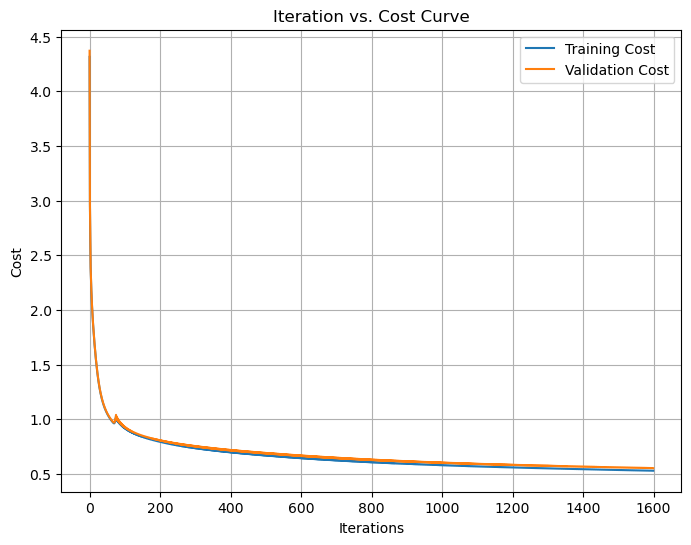

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def compute_cost(A, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    cost = -np.sum(one_hot_Y * np.log(A)) / m
    return cost

def gradient_descent(X_train, Y_train, X_val, Y_val, alpha, iterations):
    W1, b1, W2, b2 = init_params(X_train.shape[0], len(np.unique(Y_train)))
    train_costs = []
    val_costs = []
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
        train_cost = compute_cost(A2, Y_train)
        
        _, _, _, val_A2 = forward_prop(W1, b1, W2, b2, X_val)
        val_cost = compute_cost(val_A2, Y_val)
        
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        train_costs.append(train_cost)
        val_costs.append(val_cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Train Cost = {train_cost:.4f}, Val Cost = {val_cost:.4f}")
    
    return W1, b1, W2, b2, train_costs, val_costs


W1, b1, W2, b2, train_costs, val_costs = gradient_descent(x_train_split, y_train_split, x_val, y_val, alpha=0.1, iterations=1600)


plt.figure(figsize=(8, 6))
plt.plot(range(1600), train_costs, label='Training Cost')
plt.plot(range(1600), val_costs, label='Validation Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Iteration vs. Cost Curve')
plt.legend()
plt.grid()
plt.show()

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [18]:
train_predictions = make_predictions(x_train_split, W1, b1, W2, b2)
get_accuracy(train_predictions, y_train_split)

[8 7 6 ... 6 1 7] [2 9 6 ... 6 1 7]


0.8080416666666667

In [20]:
val_predictions = make_predictions(x_val, W1, b1, W2, b2)
get_accuracy(val_predictions, y_val)

[7 7 1 ... 8 8 7] [7 7 1 ... 8 8 7]


0.7965833333333333

In [22]:
test_predictions = make_predictions(x_test, W1, b1, W2, b2)
get_accuracy(test_predictions, y_test)

[0 1 2 ... 8 8 2] [0 1 2 ... 8 8 1]


0.8073

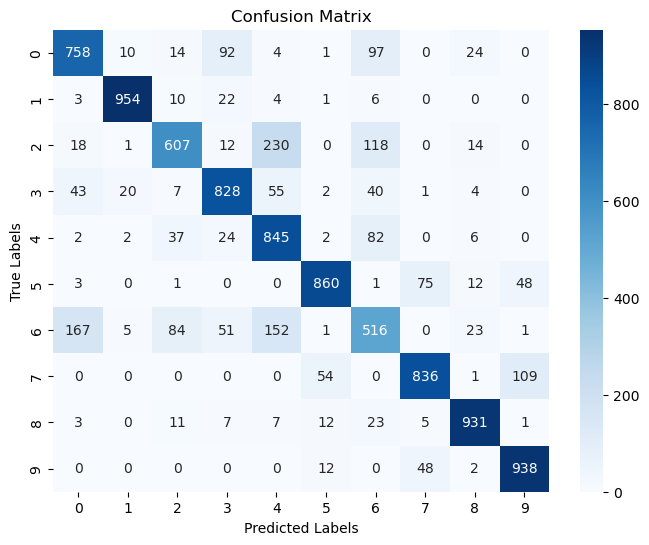

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()